# Exercise 5: Clustering


# Part 1: Theoretical Exercise (16 points)

## 1. Modified version of WCSS (5 points)

In class we mentioned that the K-means algorithm strives to minimize the *within cluster sum of square differences* (WCSS), where the sum of squares within a cluster $C_j \subset \{1,...,n\}$ is defined as follows:
$$
WCSS(C_j) := \sum_{i \in C_j} \left\|x_i - \mu_j\right\|^2,\qquad \mu_j:= \frac{1}{|C_j|}\sum_{i \in C_j} x_i ~.
$$
As an alternative to this objective, one may suggest minimizing $\widetilde{WCSS}$, which is defined as a sum over the following cluster-specific measure: 
$$
\widetilde{WCSS}(C_j) := \frac{1}{|C_j|} \sum_{a,b \in C_j} \left\|x_a - x_b\right\|^2. 
$$
$\widetilde{WCSS}(C_j)$ is the sum of all distances between pairs of samples $x_a,x_b$ within cluster $j$ divided by the number of samples in that cluster.

**Prove** that minimizing $\sum_{j=1}^k WCSS(C_j)$ is equivalent to minimizing $\sum_{j=1}^k \widetilde{WCSS}(C_j)$.

Hint: expand $WCSS(C_j)$ and $\widetilde{WCSS}(C_j)$ in a way similar to what we did in class for WCSS and TSS to recover the relationship between these measures.

## 2. Cluster centroids (5 points)

In class we claimed that the centroid update step in the K-means algorithm is optimal in the folloiwng sense:

Given a dataset $D=\{x_i\}_{i=1}^n$ and a cluster $C\subset \{1,...,n\}$, the minimizer of the function 
$$
J(u;D,C) := \sum_{i\in C} \left\|x_i - u\right\|^2,
$$
is attained at $u = \mu := \frac{1}{|C|} \sum_{i \in C} x_i$.

**Prove** this claim. 


## 3. Weighted K-means (6 points; based on Moed A 2024) 

Weighted K-means is a variant of the K-means algorithm in which each instance is given a weight representing its importance.
These weights are used when computing the cluster centroids, such that samples with higher weights have a greater influence on the location of the centroid of their cluster:
$$
\mu(C) = \frac{1}{\sum_{i\in C}w_i} \sum_{i\in C}w_ix_i ~.
$$

The code cell below specifies a dataset $X$ of 10 samples in $\mathbb{R}^3$ and the vector of weights $w$. 

- Implement and execute the weighted K-means algorithm with $k = 2$ and with initial centoids $\mu_1 = (-1,0,0)$ and $\mu_2 = (1,1,1)$.
No need to submit your code. Just specify the centroids after each iteration. 
- Does the standard K-means algorithm yield a different assignment to clusters executed with the same initial centroids?
Justify your answer.
- Does the weighted K-means algorithm always converge? If so, prove it.
If not, show an example where the algorithm fails to converge.
For simplicity, you can assume that all weights are positive integers. 

In [4]:
import numpy as np

X = np.array([[-1.52,  1.55, -1],
       [ 1.8 , -0.61, 1.1],
       [-0.39,  0.29, -0.5],
       [ 0.33,  0.66, 0.7],
       [ 2.01, -0.18, 0.9],
       [-0.8 , -1.38, -0.3],
       [-0.73, -0.03, -0.4],
       [ 1.79, -0.52, 0.8],
       [ 0.22, -0.02, -0.2],
       [ 1.19,  2.53, 0.6]])

w = np.array([3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

centers = np.array([[-1.0, 1.0, 0.0], [1.0, 1.0, 0.0]])

def weighted_centroids_kmeans(X, w, centers, tol=1e-4, max_iters=100):
       # weighted centroids k means with k=2 and the above parameters
       for iteration in range(max_iters):
              clusters = np.zeros((X.shape[0], 2)) # 10 rows representing the samples and 2 columns representing the two clusters
    
              # first we will assign points to clusters
              for i in range(X.shape[0]): # we loop over each point i in X
                     for j in range(2): # for each point we loop over the two clusters
                            distance = np.linalg.norm(X[i] - centers[j]) # we calculate the euclidean distance of point i from the centroids
                            clusters[i, j] = distance * w[i]  # we multiply the distance by the weight of point i
                            # and for no weights option: # clusters[i, j] = distance
              # assign each point to the closest cluster
              # cluster_assignments[i] will be the index of the closest cluster for point i (0 or 1)
              cluster_assignments = np.argmin(clusters, axis=1)
              
              # then we update the centroids
              new_centers = np.zeros(centers.shape)
              for j in range(2):
                     indices = np.where(cluster_assignments == j)[0] # we add [0] because np.where returns a tuple
                     if len(indices) > 0:
                            new_centers[j] = np.sum(X[indices] * w[indices].reshape(-1, 1), axis=0) / np.sum(w[indices]) # reshape is used to ensure correct broadcasting
                            # for no weights option: # new_centers[j] = np.mean(X[indices], axis=0)
                     else:
                            new_centers[j] = centers[j] # no points assigned to this cluster, keep the old center
              
              cluster_0_points = np.where(cluster_assignments == 0)[0]
              cluster_1_points = np.where(cluster_assignments == 1)[0]
              print(f"Iteration {iteration + 1}:")
              print(f"  Centroid 1: {new_centers[0][0]:>8.3f}, {new_centers[0][1]:>8.3f}, {new_centers[0][2]:>8.3f}")
              print(f"  Centroid 2: {new_centers[1][0]:>8.3f}, {new_centers[1][1]:>8.3f}, {new_centers[1][2]:>8.3f}")
              print(f"  Cluster 0 points: {cluster_0_points}")
              print(f"  Cluster 1 points: {cluster_1_points}")

              # Check for convergence
              if np.linalg.norm(new_centers - centers) < tol:
                     print(f"Converged after {iteration + 1} iterations.")
                     break
              
              centers = new_centers
              
       return new_centers, cluster_assignments

final_centers, final_assignments = weighted_centroids_kmeans(X, w, centers)



Iteration 1:
  Centroid 1:   -0.981,    0.546,   -0.671
  Centroid 2:    1.252,    0.144,    0.756
  Cluster 0 points: [0 2 5 6]
  Cluster 1 points: [1 3 4 7 8 9]
Iteration 2:
  Centroid 1:   -0.831,    0.475,   -0.613
  Centroid 2:    1.381,    0.165,    0.875
  Cluster 0 points: [0 2 5 6 8]
  Cluster 1 points: [1 3 4 7 9]
Iteration 3:
  Centroid 1:   -0.831,    0.475,   -0.613
  Centroid 2:    1.381,    0.165,    0.875
  Cluster 0 points: [0 2 5 6 8]
  Cluster 1 points: [1 3 4 7 9]
Converged after 3 iterations.


# Part 2: Coding Assignment (84 points)

In this coding assignment, you will compress an image by clustering its pixels based on their color content, as illustrated in the lecture.

The code below loads and prints the image you will be compressing and sets up the data for this assignment.
This image consists of more than 1 million pixels. **Make sure your code is vectorized and efficient!**

(564, 1200, 3)


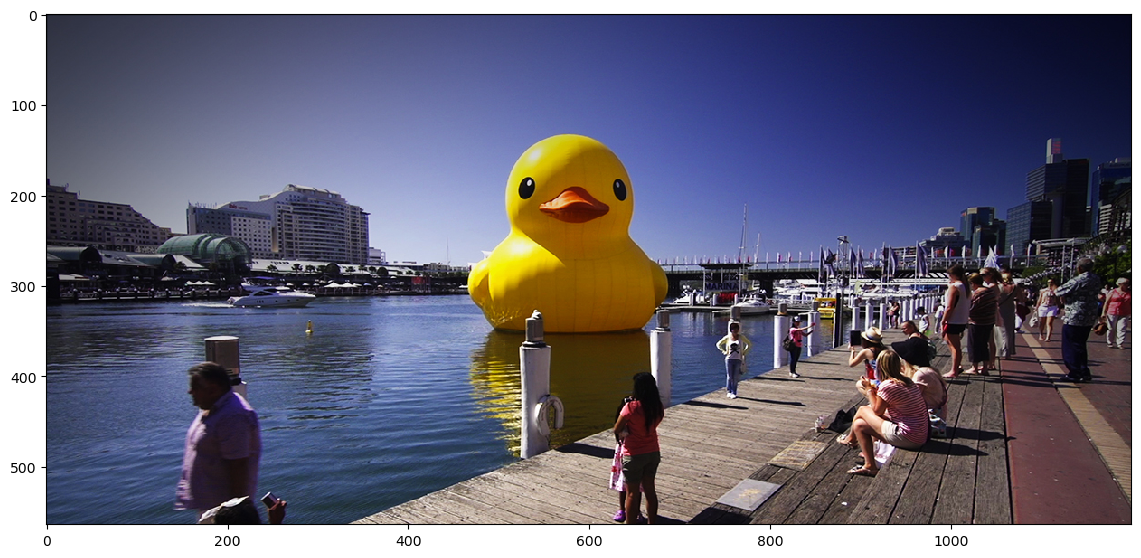

(676800, 3)


In [5]:
import numpy as np
#from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# load the image and confirm skimage is imported properly.

# Read the image and convert to numpy array
img = np.array(Image.open('small_duck.jpg'))
# Print the shape of the image
print(img.shape)
# show the image
plt.imshow(img)
plt.show()

# save the dimensions of the image and reshape it for easier manipulation
rows = img.shape[0]
cols = img.shape[1]
img_array = img.reshape([-1, 3])
print(img_array.shape)

## 1. Initialize centroids (10 points)

Implement the function `get_random_centroids` in `hw5.py`.

This function take as input a single image of shape `(num_pixels, 3)` and `k`, the number of desired centroids. It returns a numpy array with `k` different pixels from the input image, randomly selected among all possible sets of `k` pixels of the image. These pixels will be the initial centroids used by the K-means algorithm. 

The code below selects `K=12` random pixels to be used as initial centroids and then plots squares colored by the colors of the selected pixels.

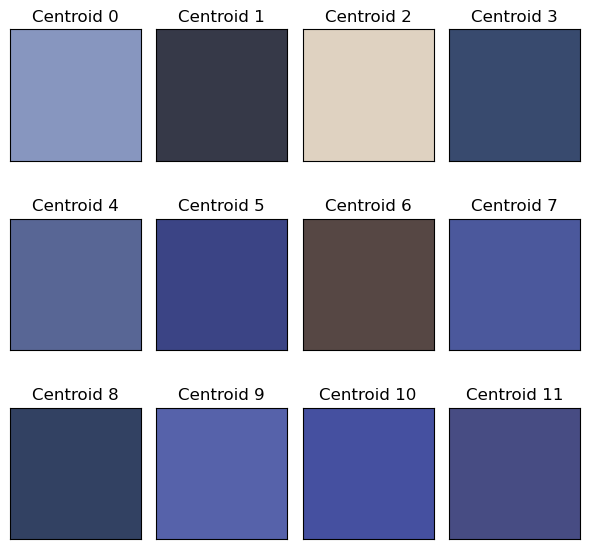

In [6]:
from hw5 import get_random_centroids

def plot_centroids(centroids):
    """
    Plot the color represented by each centroid. Use a grid of size 4 X num_centroids/4
    """
    k = centroids.shape[0]
    fig, axes = plt.subplots(np.ceil(k / 4).astype(int), 4, figsize=(6, 6))
    axes = axes.flatten()

    for j in range(k):
        # plot a square with the color of the centroid
        ax = axes[j]
        ax.set_aspect('equal')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor(centroids[j, :] / 255)
        ax.set_title(fr'Centroid {j}')
    
    plt.tight_layout()
    plt.show()


K = 12
centroids = get_random_centroids(img_array, K)
plot_centroids(centroids)

## 2. The $L_p$ distance (20 points)

Implement the function `l_p_dist_from_centroids` in `hw5.py`.

This function receives as input an image (shape `(num_pixels, 3)`),
the centroids (shape `(k, 3)`), and parameter `p` of the $L_p$ norm.
It returns an array with the $L_p$ distances from every pixel in the input image to all centroids
(shape `(k, num_pixels)`).

Recall that the $L_p$ distance is defined as: 
$$
d_{L_p}(u,v) = (\sum_{t=1}^d \mid u_t - v_t \mid ^p)^{\frac{1}{p}} ~. 
$$
(in our case, $t=3$ since all pixels and centroids are points in $\mathbb{R}^3$)

The code below applies this function to the image and the `K=12` initial centroids and then for each centroid it plots the distances from it to all pixels as a grayscale image (dark - small dist, light - large dist). Try to see whether these images make sense in light of the image colors and the color represented by each initial centroid.

Throughout this assignment, we will use the Euclidean distance, $d_{L_2}$, but your code should work well for any value of $p$.

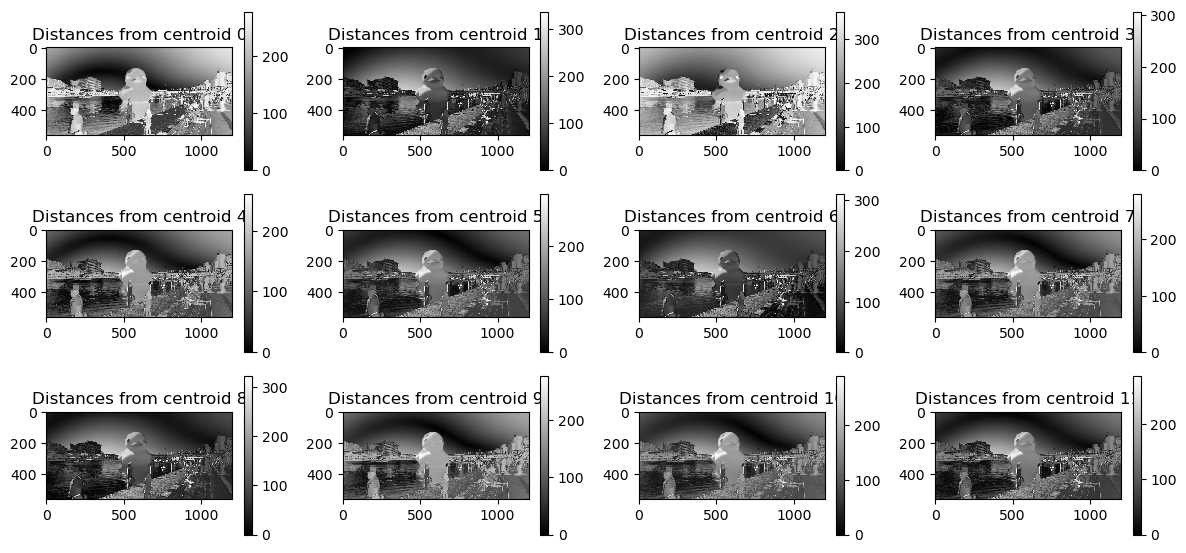

In [7]:
from hw5 import l_p_dist_from_centroids


def plot_distances(distances, rows, cols):
    """
    Plot an imgae representing the distances from each centroid to all points in the image.
    """
    k = distances.shape[0]
    fig, axes = plt.subplots(np.ceil(k / 4).astype(int), 4, figsize=(12, rows / 100))
    axes = axes.flatten()

    for j in range(k):
        im = axes[j].imshow(distances[j, :].reshape(rows, cols), cmap='gray')
        plt.colorbar(im, ax=axes[j], shrink= 1)
        axes[j].set_title(fr'Distances from centroid {j}')
    
    plt.tight_layout()
    plt.show()

P = 2 
distances = l_p_dist_from_centroids(img_array, centroids, p=P)
plot_distances(distances, rows, cols)

## 3. The K-means algorithm (34 points)


Implement the function `kmeans` in `hw5.py`.

This function implements the K-means algorithm using the $L_p$ distance.
It receives as input an image (`X`), the number of desired clusters (`k`),
the degree of the $L_p$ norm (`p`), the maximum number of iteration (`max_iter`),
and a threshold parameter (`eps`) for change in the centroids.
It intializes centroids randomly (using `get_random_centroids`), and then updates them iteratively.
In each iteration, the function assigns every pixel to its closest centroid and
then calculates new centroids by averaging the pixels that were assigned to every centroid.
The algorithm halts when reaching an update iteration in which none of the centroids are updated
(up to the threshold value of `epsilon`), or when reaching `max_iter` iterations.

The function outputs the final cluster centroids (shape `(k, 3)`),
the final assignment of pixels to clusters, and the final within-cluster spread (WCS).
For the $L_p$ norm, this is defined as:
$$
WCS := \sum_{j=1}^k\sum_{i \in C_j} \left\|x_i - \mu_j\right\|^p
$$

The code below executes this function on the image to find `K=16` clusters. 
A reasonable implementation should complete this execution on a Core i7 CPU / Apple M3 in less than a minute.

In [8]:
%%time
from hw5 import kmeans

K = 16
P = 2
centroids, cluster_assignments, WCS = kmeans(img_array, k=K, p=P, max_iter=100)

# compute total spread and use it to normalize WCS
total_spread = np.sum((img_array - img_array.mean(axis=0))**P)
print("Final WCS:", WCS)
print("Total spread:", total_spread)
print("Relative WCS:", WCS / total_spread)

Final WCS: 292577201.8550276
Total spread: 5735488018.493854
Relative WCS: 0.05101173621348768
CPU times: user 18.7 s, sys: 2.96 s, total: 21.7 s
Wall time: 21.7 s


We examine the clustering provided by the K-means algorithm in two ways.
First, we reconstruct the compressed image implied by this clustering.
This is done by replacing each pixel in the input image by the centroid of its cluster
(see function `compress_image` below).
Then, we plot the centroid colors and illustrate for each one the distances from it to all pixels as a grayscale image (dark - small dist, light - large dist). Try to see whether these images make sense in light of the image colors and the color represented by each initial centroid.

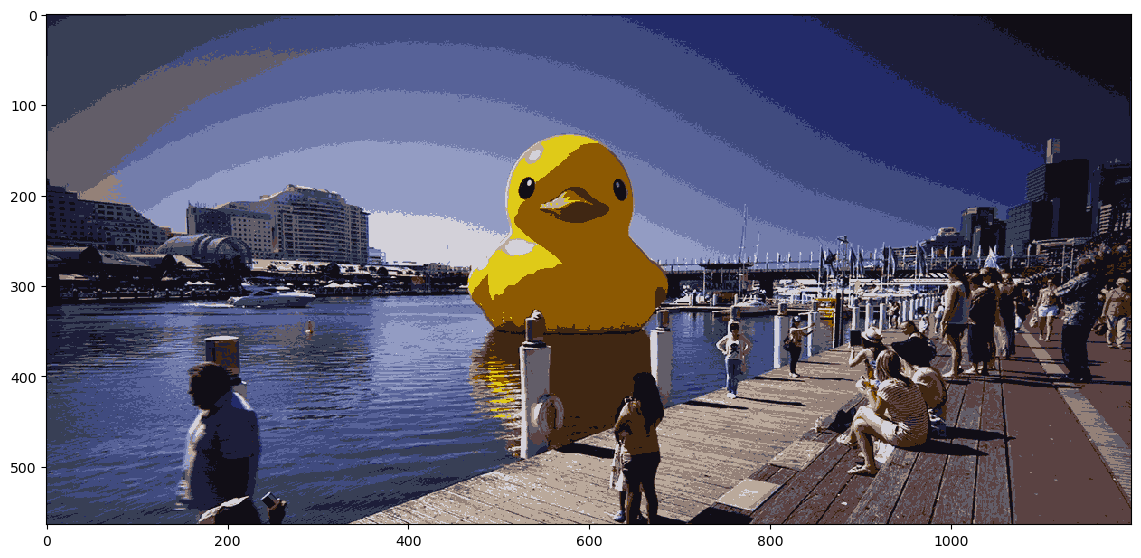

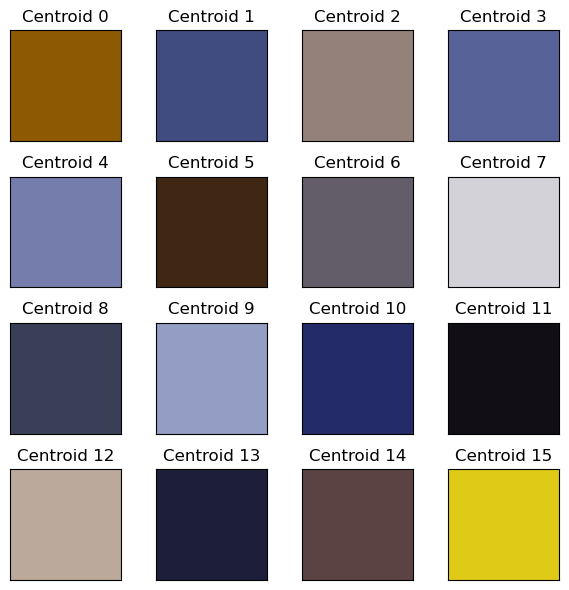

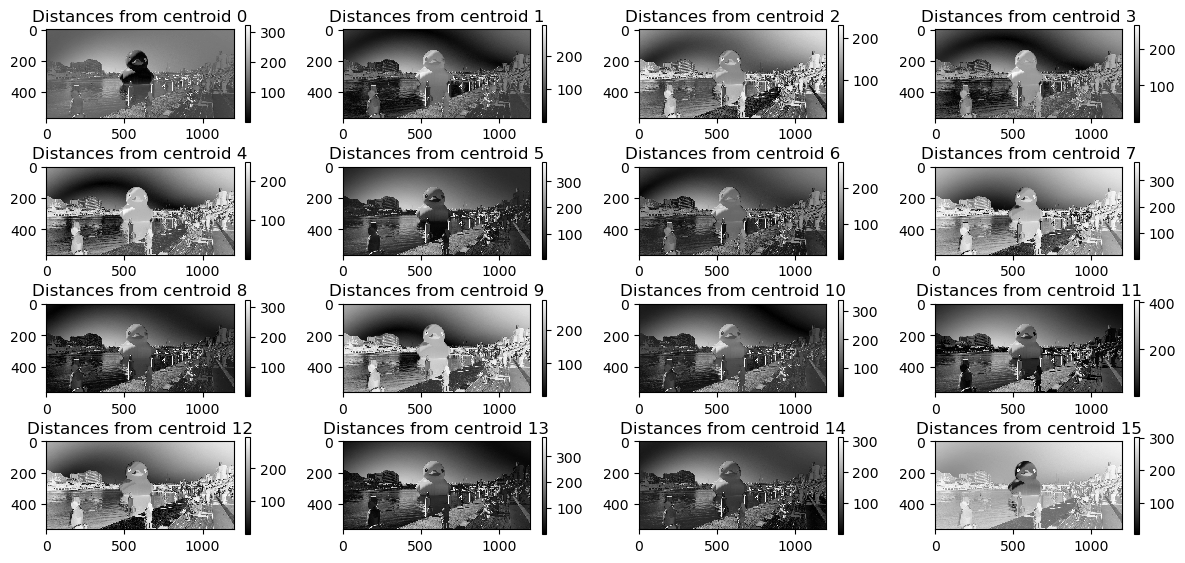

In [9]:
## Compress the image by replacing each pixel with its closest centroid
def compress_image(centroids, cluster_assignments, rows, cols) -> np.ndarray:
    """
    Compress the image by replacing each pixel with its closest centroid. 
    Inputs:
    - centroids: a numpy array of shape (k, 3) representing the centroids.
    - cluster_assignments: a numpy array of shape (num_pixels,) representing the class of each pixel.
    - rows: the number of rows in the image.
    - cols: the number of columns in the image.
    Outputs:
    - compressed_image: a numpy array of shape (rows, cols, 3) representing the compressed image.
    """
    
    cluster_assignments_reshaped = cluster_assignments.reshape(rows,cols) 
    return centroids[cluster_assignments_reshaped].astype(np.uint8)


# compress image using the centroids and cluster assignments
compressed_image = compress_image(centroids, cluster_assignments, rows, cols)
plt.imshow(compressed_image)
plt.show()

# Plot the centroids representing the colors of the compressed image
plot_centroids(centroids)

# Plot the distances from each pixel to each centroid
distances = l_p_dist_from_centroids(img_array, centroids, p=P)
plot_distances(distances, rows, cols)

The code below executes the K-means algorithm for $k=1,...,16$.
For each $k$, it illustrates the compressed image and reports the WCS relative to the total spread.

Estiamted time on mac 4M is 2min. Typically longer in other architectures. 

100%|██████████| 16/16 [02:22<00:00,  8.91s/it]


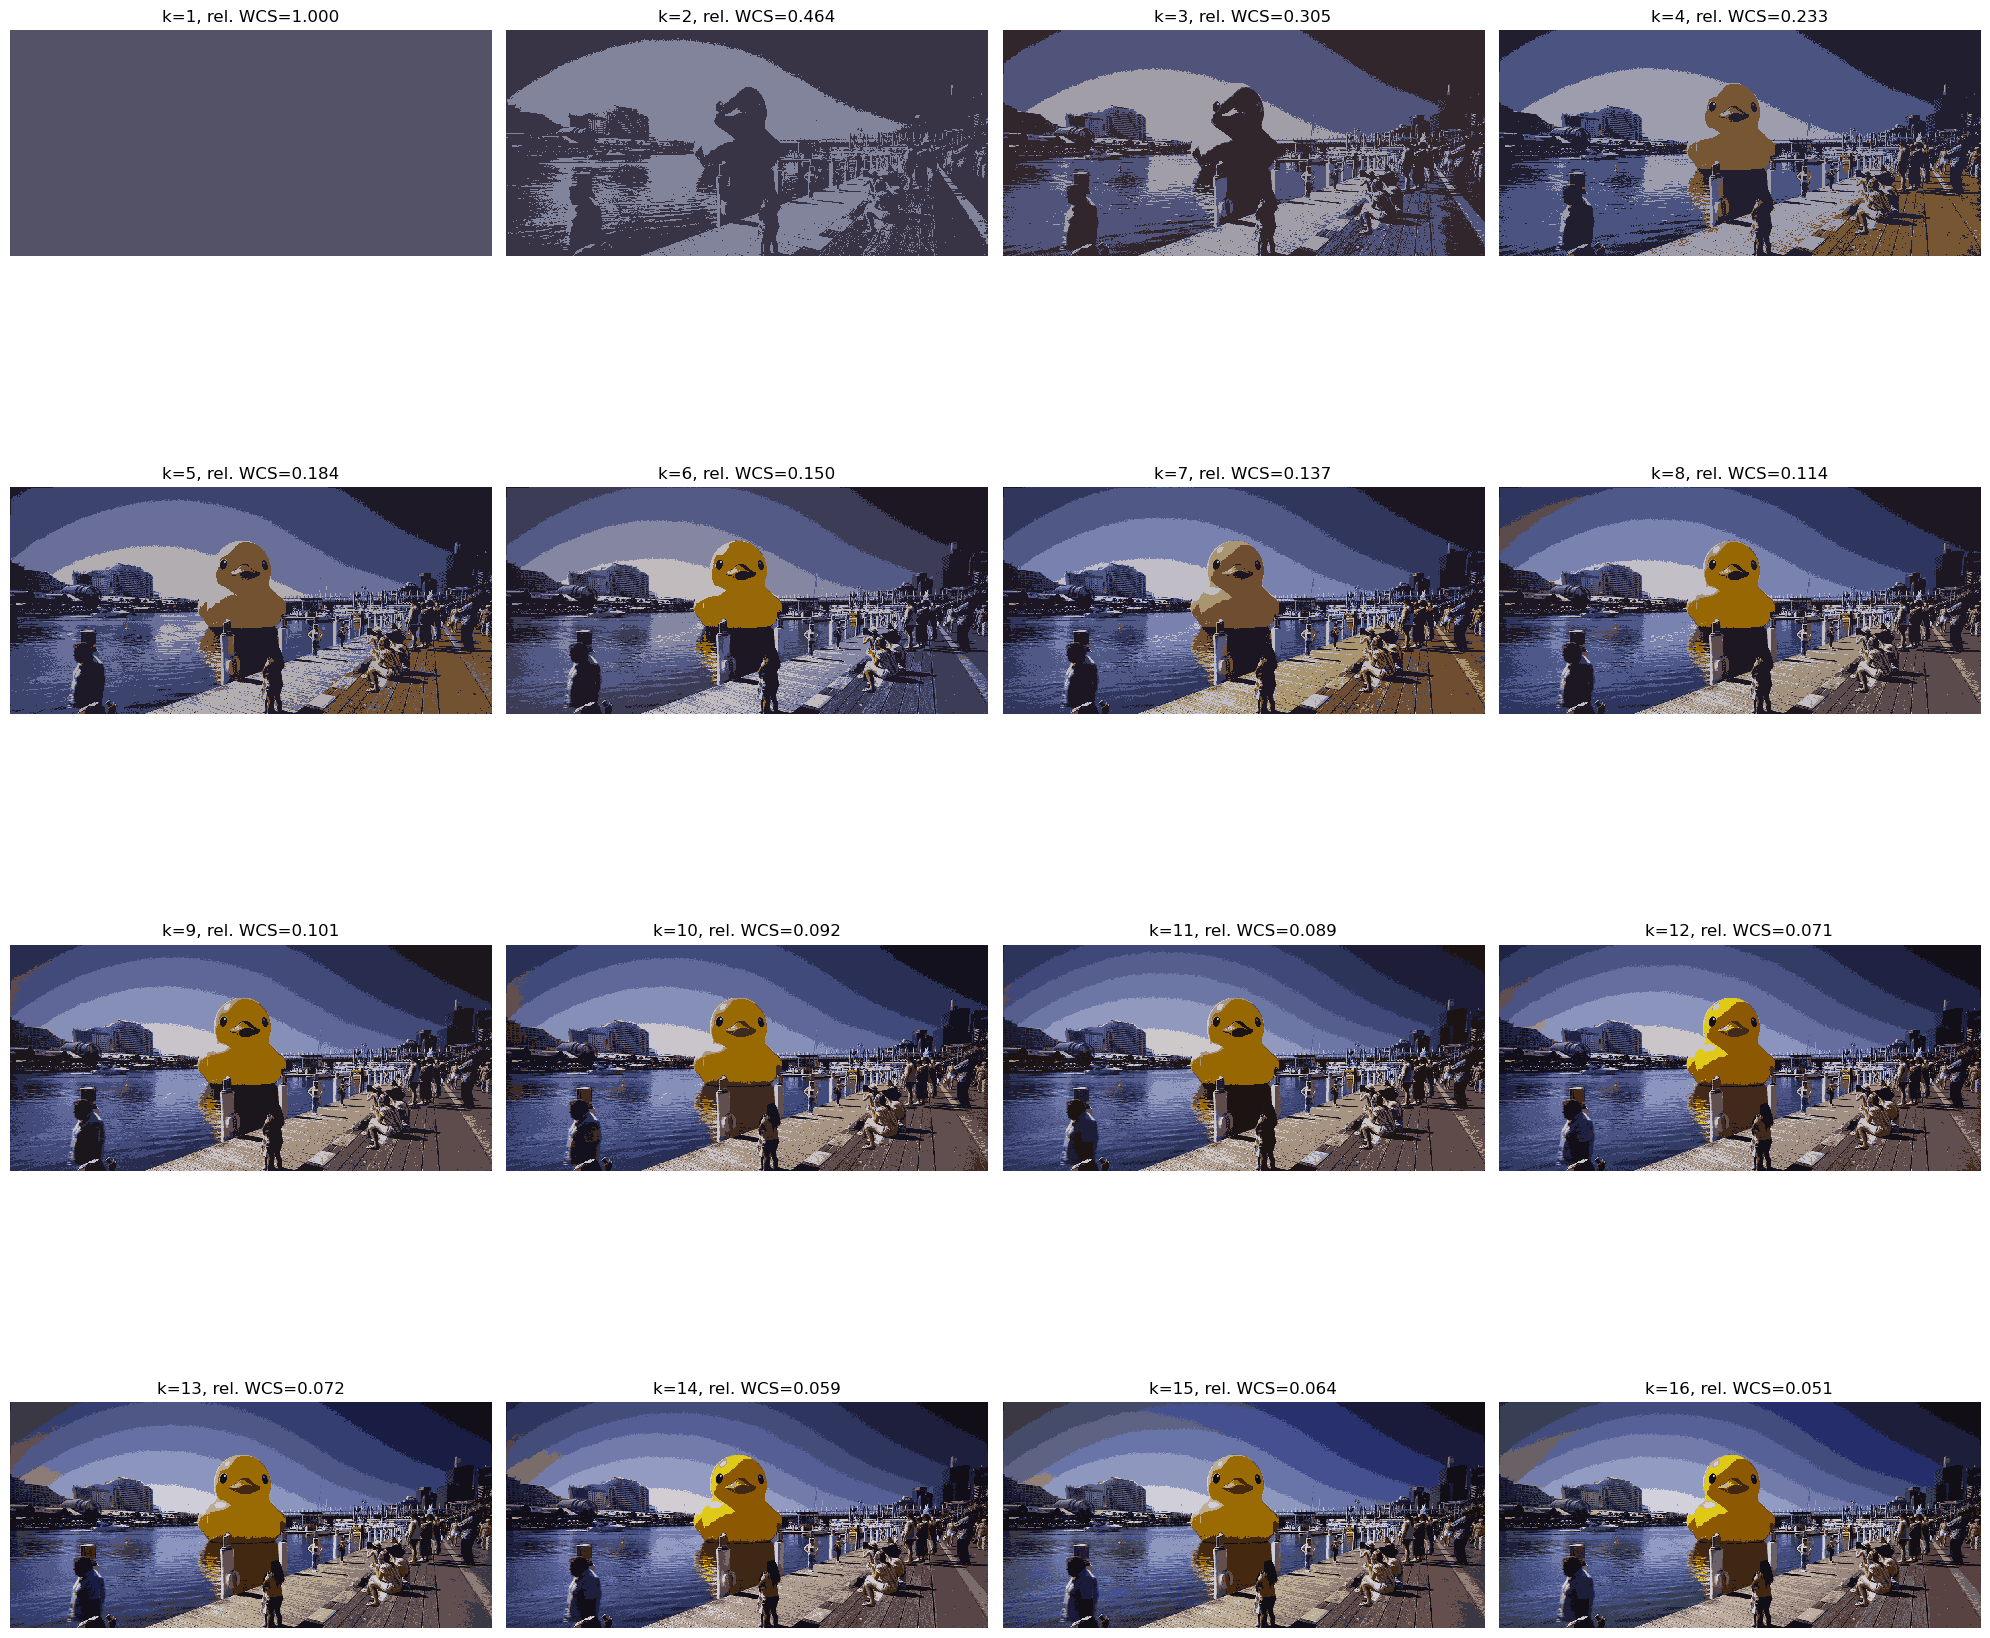

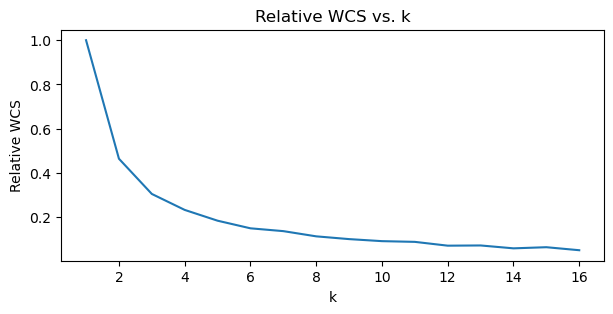

In [10]:
# Run k-means for k=1,...,16 and visualize results
from tqdm import tqdm
plt.figure(figsize=(20, 20))

total_spread = np.sum((img_array - img_array.mean(axis=0))**P)


rel_wcs = []
for k in tqdm(range(1, 17)):
    plt.subplot(4, 4, k)
    centroids, cluster_assignments, WCS = kmeans(img_array, k, P)
    compressed_img = compress_image(centroids, cluster_assignments, rows, cols)
    plt.imshow(compressed_img)
    relative_wcs = WCS / total_spread
    rel_wcs.append(relative_wcs)
    plt.title(f'k={k}, rel. WCS={relative_wcs:.3f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(np.arange(1, 17), rel_wcs)
plt.xlabel('k')
plt.ylabel('Relative WCS')
plt.title('Relative WCS vs. k')
plt.show()

## 4. Alternative centroid initialization (20 points)

Implement the function `kmeans_pp` in `hw5.py`, which implements a version of the K-means algorithm with **updated centroid initialization procedure**. The function has the same interface as the `kmeans` function and it executes the standard K-means iterative update procedure. It differs only by the way that cluster centroids are initialized. It is commonly referred to as K-means++.

The selection of initial centroids is perfomed in `kmeans_pp` as follows:

1. Select the first centroid uniformly at random among the data instances.

2. For each data sample $x_i$, calculate its distance to the closest centroid (based on $L_p$):
$$
\delta(i) = \min_j \{d(x_i,\mu_j)\}
$$

3. Select the next centroid by sampling from the data samples with probability proportional
to $\delta(i)^2$. Formally, the probability to select $x_i$ as the next centroid is:
$$
p(i) = \frac{1}{A}\delta(i)^2  ~~,~ A = \sum_{i'=1}^n\delta(i)^2 ~.
$$

4. Repeat steps 2-3 until $k$ centroids have been selected.

This initialization strategy tends to spread out the initial centroids,
typically resulting in convergence to a better solution (lower WCS) than when randomly initializing the centroids.


The code block below executes `kmeans_pp` to compress the image using `K=16` clusters.
Compare this clustering to the one you obtained using the standard random initialization.

Final WCS: 291532267.2349328
Relative WCS: 0.05082954864431737


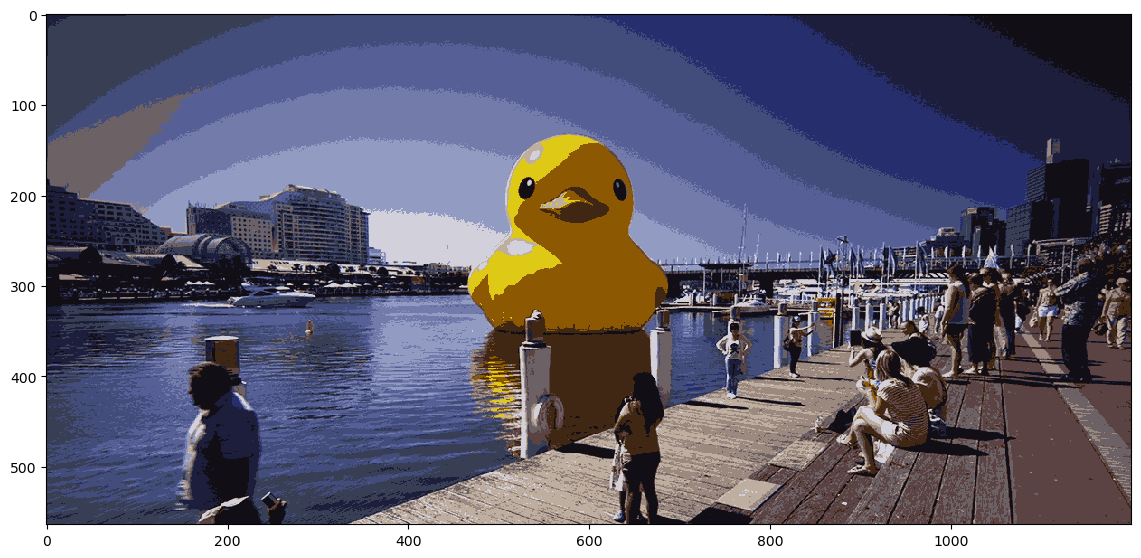

CPU times: user 20.6 s, sys: 2.55 s, total: 23.1 s
Wall time: 22.6 s


In [11]:
%%time
from hw5 import kmeans_pp

K = 16
P = 2
centroids_pp, cluster_assignments_pp, WCS_pp = kmeans_pp(img_array, k=K, p=P, max_iter=100)
print("Final WCS:", WCS_pp)
total_spread = np.sum((img_array - img_array.mean(axis=0))**P)
print("Relative WCS:", WCS_pp / total_spread)

compressed_image = compress_image(centroids_pp, cluster_assignments_pp, rows, cols)
plt.imshow(compressed_image)
plt.show()

The code below compares `kmeanspp` with the standard `kmeans` on `K=7`.
Each algorithm is executed `n_iters = 3` times with different initializations.
The average WCS and minimum WCS across repetitions are reported.
Examine these results to figure out what we gained by imporving the initialization.

In [13]:
from hw5 import kmeans_pp, kmeans
from tqdm import tqdm
import time

# set seed
np.random.seed(42)

K = 7
P = 2

results_pp = []
results_standard = []

n_iters = 3

for itr in tqdm(range(n_iters)):
    start_time = time.time()    
    centroids_pp, cluster_assignments_pp, WCS_pp = kmeans_pp(img_array, k=K, p=P, max_iter=100)
    end_time = time.time()
    centroids_standard, cluster_assignments_standard, WCS_standard = kmeans(img_array, k=K, p=P, max_iter=100)
    end_time_standard = time.time()

    results_pp.append((centroids_pp, cluster_assignments_pp, WCS_pp, end_time - start_time))
    results_standard.append((centroids_standard, cluster_assignments_standard, WCS_standard, end_time_standard - start_time))

print("kmeans++ average WCS:", np.mean([r[2] for r in results_pp]))
print("kmeans average WCS:", np.mean([r[2] for r in results_standard]))
print("="*100)
print("kmeans++ minimum WCS:", min([r[2] for r in results_pp]))
print("kmeans minimum WCS:", min([r[2] for r in results_standard]))
print("="*100)
print("kmeans++ average time:", round(np.mean([r[3] for r in results_pp])/60, 3), "minutes")
print("kmeans average time:", round(np.mean([r[3] for r in results_standard])/60, 3), "minutes")
print("="*100)


100%|██████████| 3/3 [00:36<00:00, 12.29s/it]

kmeans++ average WCS: 778665930.2871546
kmeans average WCS: 739161675.2878014
kmeans++ minimum WCS: 771099272.752478
kmeans minimum WCS: 739161675.2878014
kmeans++ average time: 0.096 minutes
kmeans average time: 0.205 minutes
